# Notebook to test DecisionTree implementation

In this notebook we use the well-known Iris data set to check if our implementation of the regression tree algorithm works. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from DecisionTree import *
warnings.simplefilter('ignore')

In [2]:
iris_df = pd.read_csv("datasets/iris.csv")
iris_df.head()

,Unnamed: 0,sepal_length,sepal_width,petal_length,petal_width,species
0,0,5.1,3.5,1.4,0.2,0
1,1,4.9,3.0,1.4,0.2,0
2,2,4.7,3.2,1.3,0.2,0
3,3,4.6,3.1,1.5,0.2,0
4,4,5.0,3.6,1.4,0.2,0


The data set contains data on features (sepal_length, sepal_width, petal_length, petal_width) and outcome (species). Figure 1 should clear things up. We also note that the first column of our data set is just the index, lets drop it. Our interest lies in classifying the correct species of the flower given features. 

<figure>
    <img src="http://s5047.pcdn.co/wp-content/uploads/2015/04/iris_petal_sepal.png"
         alt="Figure 1">
    <figcaption>Figure 1</figcaption>
</figure>

In [3]:
# only execute once!
iris_df = iris_df.drop(iris_df.columns[[0]], axis=1)
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Now the data set looks way nicer, lets do some data visualization. The plot below displays various scatter plots. Consider the features petal_width and petal_length. From the plot it is clear that we can partition the space thats spanned by these two features with rectangles and predict in each of the rectangles nearly without error the right species. If the decision tree algorithm works correct, we would expect it to form these partitions. The second image highlights this correlation. 

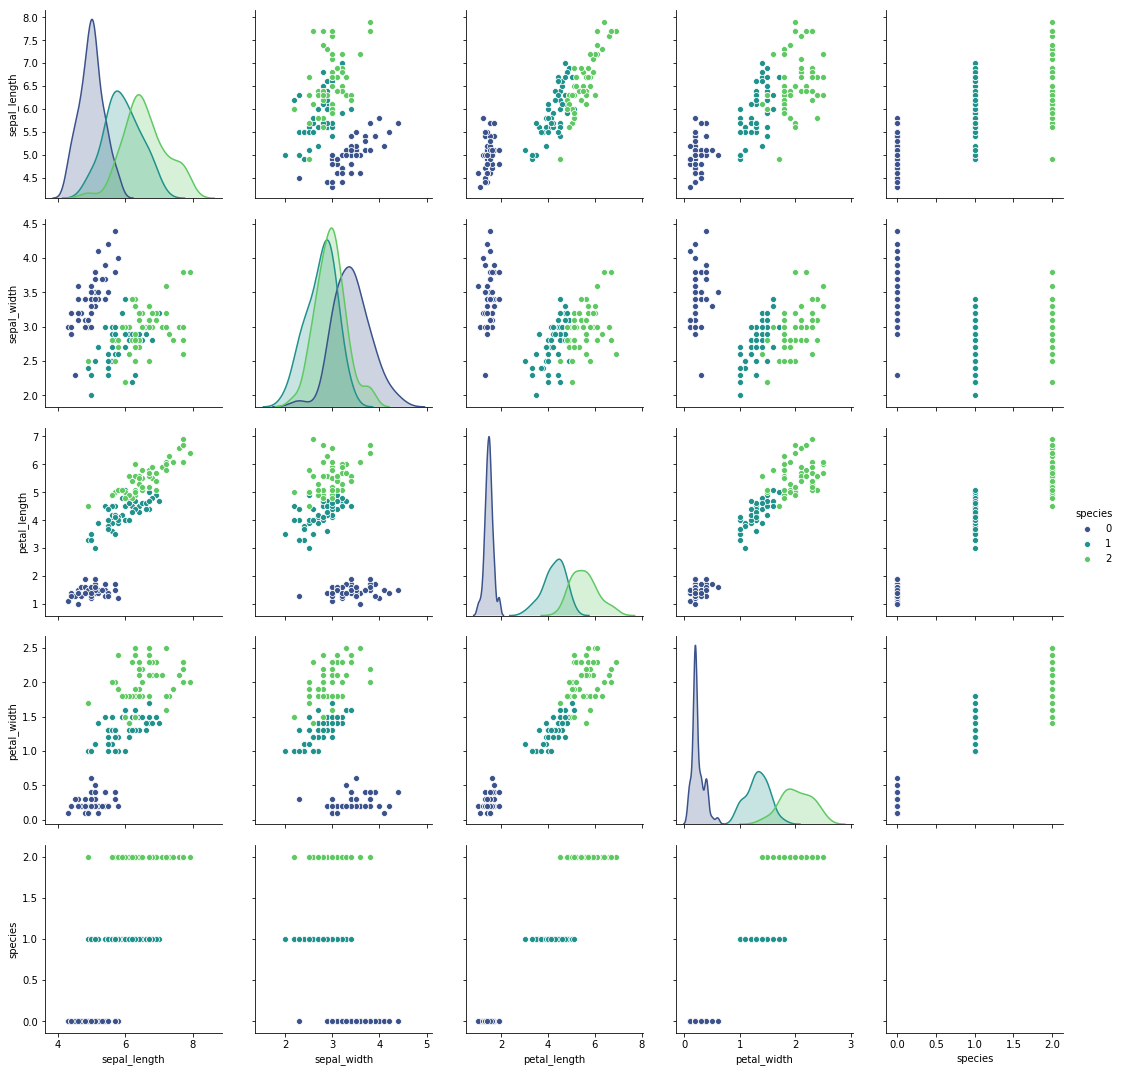

In [4]:
sns.pairplot(iris_df, hue="species", palette="viridis", height=3)

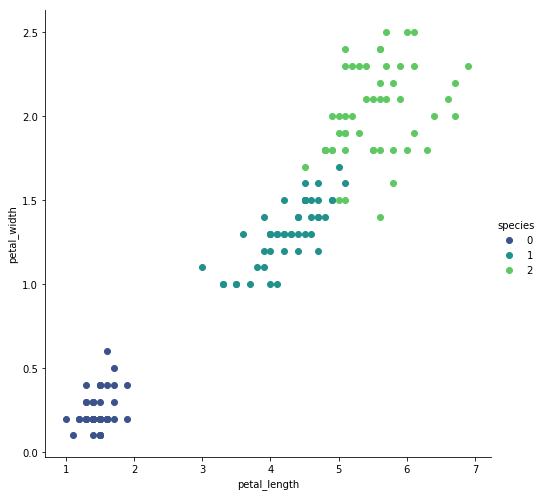

In [5]:
sns.FacetGrid(iris_df, hue="species", palette="viridis", height=7) \
   .map(plt.scatter, "petal_length", "petal_width") \
   .add_legend()

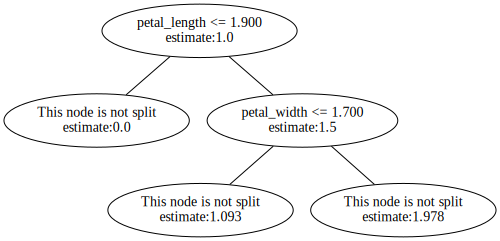

In [6]:
# construct outcome and feature
X = iris_df.iloc[:, 0:4].copy()
y = iris_df["species"].copy()

dtree = DecisionTree()
dtree.fit(X, y)

opt_tree = DecisionTree.apply_kFold_CV(X, y, k=5, thresh=4, fitted_tree=dtree)
opt_tree.plot()

# we use thresh=4 here to produce a very small tree for visualization purposes

We see clearly that the decision tree algorithm works exactly as expected. Hence we can use this algorithm implementation as a base for our Causal Tree. 

## References

* [Iris flower data set](https://en.wikipedia.org/wiki/Iris_flower_data_set) - Wikipedia
* [Iris flower data set](https://archive.ics.uci.edu/ml/datasets/iris) - UCI Machine Learning Archive